# Text Preprocessing with Keras

In [1]:
# importing libraries

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D
import tsensor
import numpy as np

## Tokenization

In [2]:
# Tokenising sentences
sentences = [
    'The quick brown fox jumps over the lazy dog.'
]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [3]:
tokenizer.word_index

{'the': 1,
 'quick': 2,
 'brown': 3,
 'fox': 4,
 'jumps': 5,
 'over': 6,
 'lazy': 7,
 'dog': 8}

In [4]:
train_sequence = tokenizer.texts_to_sequences(sentences)
train_sequence = np.array(train_sequence)
print(train_sequence)

[[1 2 3 4 5 6 1 7 8]]


## Creating Embedding Layer

In [5]:
# Create a random embedding layer

embedding = Embedding(input_dim=len(train_sequence[0]), output_dim=128)

In [6]:
# Get the embeddings of the train sample

train_sample = embedding(train_sequence)

In [7]:
train_sequence.shape

(1, 9)

In [8]:
train_sample.shape

TensorShape([1, 9, 128])

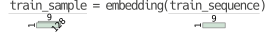

In [9]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    train_sample = embedding(train_sequence)

In [10]:
train_sample[0]

<tf.Tensor: shape=(9, 128), dtype=float32, numpy=
array([[-0.00653017, -0.01477255,  0.01209675, ..., -0.01030021,
         0.01023171,  0.04079631],
       [-0.03097173,  0.02954855,  0.03701622, ...,  0.00420471,
        -0.0074378 ,  0.04115853],
       [-0.02223851, -0.00776981,  0.01083126, ..., -0.04100982,
         0.03035263, -0.02286271],
       ...,
       [-0.00653017, -0.01477255,  0.01209675, ..., -0.01030021,
         0.01023171,  0.04079631],
       [ 0.0317664 ,  0.03740836,  0.0073595 , ...,  0.04940554,
        -0.04428858,  0.01171613],
       [ 0.0318465 ,  0.0109368 , -0.04602962, ..., -0.0221949 ,
         0.03233225, -0.04208098]], dtype=float32)>

## Averaging across tokens

In [11]:
GlobalAveragePooling1D()(train_sample)

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[-5.6301765e-03,  8.7247873e-03,  8.9307241e-03,  1.3789811e-02,
         1.2655821e-02,  6.2228013e-03,  1.8423989e-02, -1.7215732e-02,
         5.3576319e-03, -1.4848424e-02, -8.2266787e-03, -6.7976164e-03,
        -2.0327129e-04, -1.6298329e-03,  2.6206523e-02, -9.8892469e-03,
        -3.4462491e-03, -7.7328500e-03,  2.4127716e-02, -3.6134811e-03,
         5.7895146e-03,  8.8595403e-03,  5.7778414e-03,  1.0143078e-02,
         5.5283778e-03, -5.5212085e-03, -7.4683609e-03, -2.0855645e-02,
         1.3777938e-02, -9.2835203e-03,  1.1691762e-02,  1.7951773e-02,
        -5.0790254e-03, -1.0205711e-02,  2.3111445e-03, -1.3596339e-02,
         1.5111949e-02,  1.5504699e-02, -5.6034364e-03, -4.9394052e-03,
        -8.3701182e-03,  2.4673471e-03, -1.5303837e-02,  7.4780700e-03,
         6.8294164e-03, -1.5032189e-02, -6.1023426e-03, -7.1097347e-03,
        -6.2291622e-03, -3.4868894e-03, -2.6496628e-03,  4.2946958e-03,
        -2.514

![](images/Emb6.png)

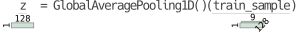

In [12]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    z = GlobalAveragePooling1D()(train_sample)

## Creating Word Embeddings for more than one sentence

In [13]:
# More than one sentence

test_corpus = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick brown fox.',
    'The lazy dog.',
    'The dog.',
    'Dog and the fox.',
    'Hello, world!'
]
encoded_sentences = tokenizer.texts_to_sequences(test_corpus)
for sentence, encoded_sentence in zip(test_corpus, encoded_sentences):
    print(sentence, encoded_sentence)

The quick brown fox jumps over the lazy dog. [1, 2, 3, 4, 5, 6, 1, 7, 8]
The quick brown fox. [1, 2, 3, 4]
The lazy dog. [1, 7, 8]
The dog. [1, 8]
Dog and the fox. [8, 1, 4]
Hello, world! []


## Padding Sequences

In [14]:
# Length of each sentence in the corpus

[len(sentence) for sentence in encoded_sentences]

[9, 4, 3, 2, 3, 0]

In [15]:
# Length of the longest sentence

max([len(sentence) for sentence in encoded_sentences])

9

In [16]:
MAX_SEQUENCE_LENGTH = 9

In [17]:
# Padding sequences that are shorter than the longest sequence

X = pad_sequences(encoded_sentences, maxlen=MAX_SEQUENCE_LENGTH)
X

array([[1, 2, 3, 4, 5, 6, 1, 7, 8],
       [0, 0, 0, 0, 0, 1, 2, 3, 4],
       [0, 0, 0, 0, 0, 0, 1, 7, 8],
       [0, 0, 0, 0, 0, 0, 0, 1, 8],
       [0, 0, 0, 0, 0, 0, 8, 1, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

## Embedding Layer

In [18]:
# Training data with more than 1 sentences

X.shape

(6, 9)

In [19]:
# Embeddings of the larger corpus

X_embedded = embedding(X)

In [20]:
X_embedded.shape

TensorShape([6, 9, 128])

In [21]:
X_embedded

<tf.Tensor: shape=(6, 9, 128), dtype=float32, numpy=
array([[[-0.00653017, -0.01477255,  0.01209675, ..., -0.01030021,
          0.01023171,  0.04079631],
        [-0.03097173,  0.02954855,  0.03701622, ...,  0.00420471,
         -0.0074378 ,  0.04115853],
        [-0.02223851, -0.00776981,  0.01083126, ..., -0.04100982,
          0.03035263, -0.02286271],
        ...,
        [-0.00653017, -0.01477255,  0.01209675, ..., -0.01030021,
          0.01023171,  0.04079631],
        [ 0.0317664 ,  0.03740836,  0.0073595 , ...,  0.04940554,
         -0.04428858,  0.01171613],
        [ 0.0318465 ,  0.0109368 , -0.04602962, ..., -0.0221949 ,
          0.03233225, -0.04208098]],

       [[-0.04681294, -0.01992042,  0.0171947 , ...,  0.04939094,
         -0.00223154,  0.00709299],
        [-0.04681294, -0.01992042,  0.0171947 , ...,  0.04939094,
         -0.00223154,  0.00709299],
        [-0.04681294, -0.01992042,  0.0171947 , ...,  0.04939094,
         -0.00223154,  0.00709299],
        ...,
 

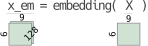

In [22]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    x_em = embedding(X)

In [23]:
X.shape

(6, 9)

In [24]:
x_em.shape

TensorShape([6, 9, 128])

## Averaging across tokens

![](images/Emb6.png)

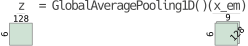

In [25]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    z = GlobalAveragePooling1D()(x_em)

In [26]:
z.shape

TensorShape([6, 128])